Going to model the data here.

In [50]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')

hpx = [0, 24]
hpy = [150, 0]

In [51]:
ic = (0, 150)
ac = (100, .1, .05)

def func(x, GB, kr, GP, V=20):
    dB = GB/V - kr * x[0] * x[1]
    dP = GP/V - kr * x[0] * x[1]
    return(dB, dP)

def err(params):
    GB, kr, GP = params
    ODEoutputB = odeint(func, ic, data["time"], args = (GB, kr, GP))
    ODEoutputP = odeint(func, ic, hpx, args = (GB, kr, GP))
    errB = (ODEoutputB[:,0] - data["Hp"])**2
    errP = (ODEoutputP[:,1] - hpy)**2
    return (np.sum(errB) + np.sum(errP))

bounds = ([0.05, 1000], [0.05, 1], [0.05, 10])
sol = minimize(err, x0 = ac, bounds = bounds, method='nelder-mead')
print(sol)

c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


 final_simplex: (array([[0.05      , 0.05      , 0.55148421],
       [0.05      , 0.05      , 0.55147803],
       [0.05      , 0.05      , 0.55147722],
       [0.05      , 0.05      , 0.55148594]]), array([213406.12131046, 213406.12131596, 213406.12133883, 213406.12136255]))
           fun: 213406.12131046198
       message: 'Optimization terminated successfully.'
          nfev: 189
           nit: 105
        status: 0
       success: True
             x: array([0.05      , 0.05      , 0.55148421])


In [52]:
# plotdf(func, # Function giving the rhs of the diff. eq. system
#      np.array([0,200]), # [xmin,xmax]
#      np.array([0,200]),# [ymin,ymax]
#      [(0,150)], # list of initial values for trajectories (optional)
#      # Additional parameters for `f` (optional)
#      parameters={"GB":50,"kr":0.3,"GP":0.01},
#      gridsteps=20,
#      nsteps = 10000,
#      tmax=20)

# plt.xlabel("B, concentration of hemoglobin (g/dL)")
# plt.ylabel("P, concentration of haptoglobin (g/dL)")

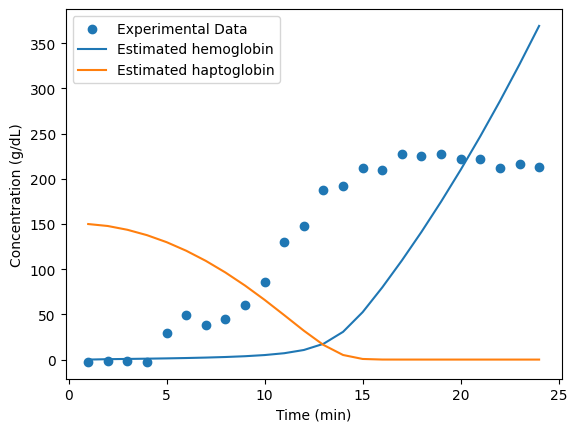

In [53]:
fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1], sol.x[2]))
plt.scatter(data["time"], data['Hp'], label = "Experimental Data")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (g/dL)")
plt.legend()